## Вводная часть

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что вовремя сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red ; margin-bottom:20px">Комментарий наставника</h1>

Стоит в начале работы прикреплять описание проекта


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
Описание добавлено, отлично

<b>Описание проекта</b>
<br><br>
Аналитика для интернет-магазина <i>«Стримчик»</i>, который продаёт по всему миру компьютерные игры. 
<br><br>
Необходимо определить закономерности, влияющие на успешность игр, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Представлены данные из открытых источников до 2016 года.
<br><br>
Рекламная кампания будет проводиться в следующем году.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<b>Описание данных:</b>
<ul>
<li><b>Name</b> — название игры</li>
<li><b>Platform</b> — платформа</li>
<li><b>Year_of_Release</b> — год выпуска</li>
<li><b>Genre</b> — жанр игры</li>
<li><b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)</li>
<li><b>EU_sales</b> — продажи в Европе (миллионы долларов)</li>
<li><b>JP_sales</b> — продажи в Японии (миллионы долларов)</li>
<li><b>Other_sales</b> — продажи в других странах (миллионы долларов)</li>
<li><b>Critic_Score</b> — оценка критиков (максимум 100)</li>
<li><b>User_Score</b> — оценка пользователей (максимум 10)</li>
<li><b>Rating</b> — рейтинг от организации ESRB.</li>
</ul>

В Data Frame необходимо:
<ul>
<li>Привести названия столбцов в нижний регистр</li>
<li>Перевести Year_of_Release из типа данных float64 в int</li>
<li>Перевести Critic_Score из типа данных float64 в int</li>
<li>Перевести User_Score из типа данных object в int, умножив на 10, чтобы привести к единому формату рейтинга с Critic_Score</li>
</ul>

В столбцах Year_of_Release, Critic_Score, User_Score и Rating присутствую пропуски. Однако их невозможно заполнить из доступных данных.<br>
Заполять их неверными значиями — будет ошибкой. Пропуски можно оставить, так как на решение поставленных в анализе задача пропуски не повлияют.<br><br>

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Данные загружены и изучены, класс

## Предобработка данных

In [5]:
(
    df.set_axis(
        ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
         'other_sales', 'critic_score', 'user_score', 'rating'],
        axis='columns',
        inplace=True)
)

Переименовываем названия колонок в нижний регистр.

In [6]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

In [7]:
df['user_score'] = df['user_score'].replace('tbd', -1)

В колонке user_score присутствуют значения tbd.<br>
По факту данные значения в текущем анализе нам не нужны, так как они относятся к пропускам (“to be determined”, мало отзывов).<br>
Однако заменим аббревиатуру 'tbd' в столбцах с рейтингом user_score заменяем на -1, чтобы сохранить эти строки и использовать, если они понадобятся.<br>

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')

Переводим year_of_release и critic_score в int.

In [9]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') * 10

In [10]:
df['user_score'] = df['user_score'].astype('Int64')

Переводим user_score в int.

In [11]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Добавляем суммарные продажи.

<b>Выводы:</b><br>
Все возможные неверные значения в Data Frame исправили. Data Frame готов к анализу.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Все значения исправлены верно, супер)

## Анализ данных

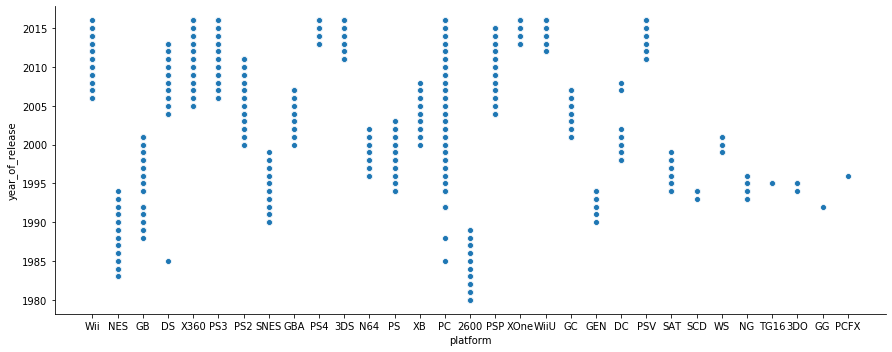

In [12]:
sns.relplot(data=df, y='year_of_release', x='platform', height=5, aspect=20/8)

Посмотрим даты выхода игр на всех платформах. Для анализа имеет смысл брать те платформы, на которых до сих пор выходят игры.<br>
Это Wii, X360, PS3, PS4, 3DS, PC, XOne, WiiU, PSV.

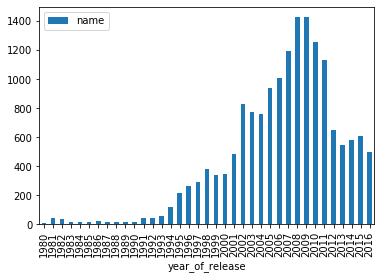

In [13]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar')

Посмотрим распределения количества выходящих игр по годам.<br>
До 2008 года идет рост по количеству выходящих игр, а с 2010 начинается спад.

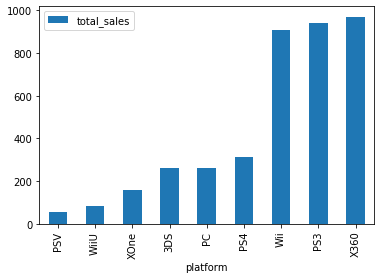

In [14]:
(
    df
    .query('platform in ["Wii", "X360", "PS3", "PS4", "3DS", "PC", "XOne", "WiiU", "PSV"]')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    .plot(kind='bar')
)

На PSV и WiiU продажи низкие. Данные платформы провалились.<br>
Исследованить провальные консоли для анализа будующих продаж не имеет смысла.

In [15]:
platforms = ['Wii', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne']

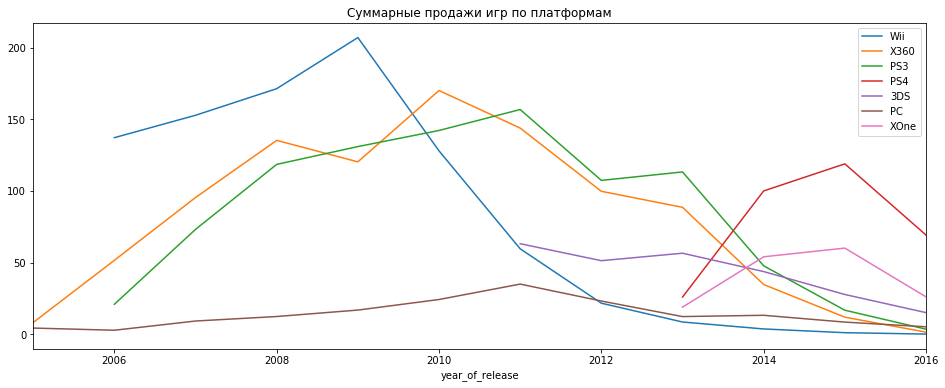

In [16]:
ax = plt.gca()

legend = []
for i in range(len(platforms)):
    legend.append(platforms[i])
    (df
    .query('platform == @platforms[@i] & year_of_release > 2004')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(figsize=(16,6), ax=ax, title='Суммарные продажи игр по платформам')
    )
    
ax.legend(legend)

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Визуализация верная

Посмотрим продажи на выбранных платформах по годам.<br>
Игры на них начали появляться с 2005 года. Выберем 2005 год как начальную точку.<br><br>
Топ 3 актуальных на данный момент плфтормы — это XOne, PS4 и 3DS.<br>
На других плтформах либо ниже выручка от продаж игр, либо подошли к концу "жизненного цикла" и не имеют перспектив.<br><br>
"Жизненный цикл" платформ составляет около 10 лет.<br><br>
Для анализа возьмем платформы Wii, X360, PS3, PS4, 3DS, XOne, PC так как они не провалились в продажах и отражают реальную картину.

In [17]:
df_by_top = df.query('year_of_release > 2004 & platform in ["Wii", "X360", "PS3", "PS4", "3DS", "XOne", "PC"]')

(0, 1.5)

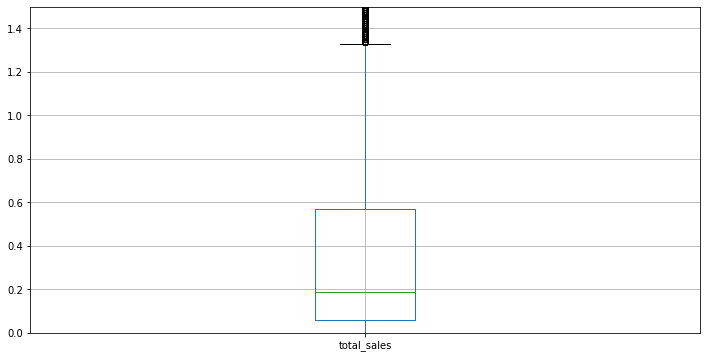

In [18]:
df_by_top.boxplot(column='total_sales', figsize=(12, 6)).set_ylim(0, 1.5)

In [19]:
df_by_top['total_sales'].describe()

count    5788.000000
mean        0.636285
std         1.927403
min         0.000000
25%         0.060000
50%         0.190000
75%         0.570000
max        82.540000
Name: total_sales, dtype: float64

В среднем продажи игр составлют 0,63 млн и редко превышают 1,3 млн. Медиана на отметке 190 тыс.

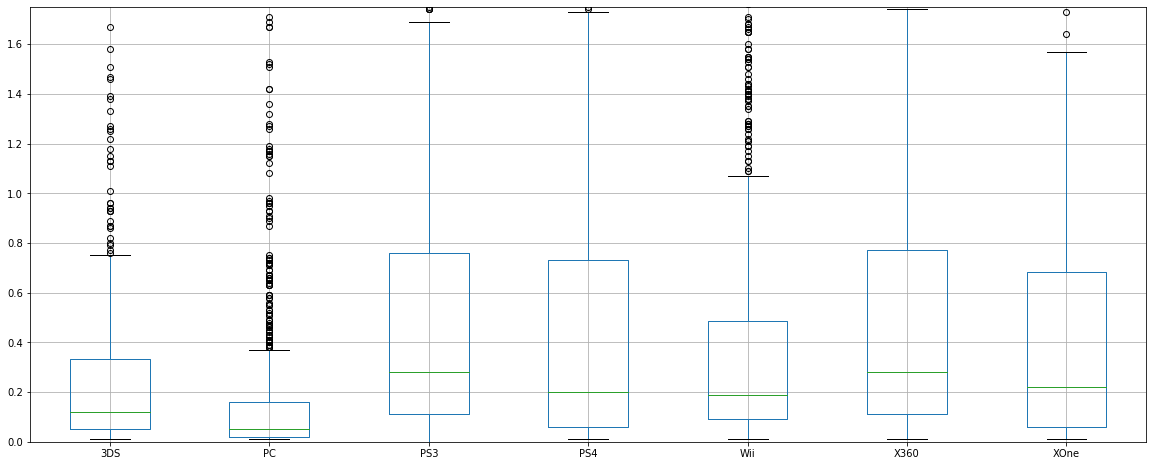

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
(
    df_by_top
    .pivot_table(index='name', columns='platform', values='total_sales')
    .boxplot(ax=ax)
)
ax.set_ylim(0, 1.75)
plt.show()

Выручки на платформах PS3, PS4, X360 и XOne схожи, так как это станционарные домашние консоли текущего и прошлого поколений.<br>
Преимущественно она не превышают 1,6 млн с медианой между 200 тыс и 400 тыс.<br>
На Wii и 3DS продажи отличаются, так как у компании Nintendo мало мультиплатформенных игр.<br>
Продажи на PC, вероятнее всего, страдают из-за "пиратства" — они ниже, чем на других платформах.

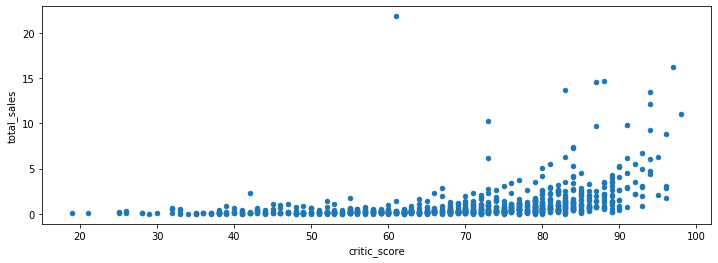

In [21]:
(
    df_by_top[df_by_top['platform'] == 'X360']
    .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12,4))
)

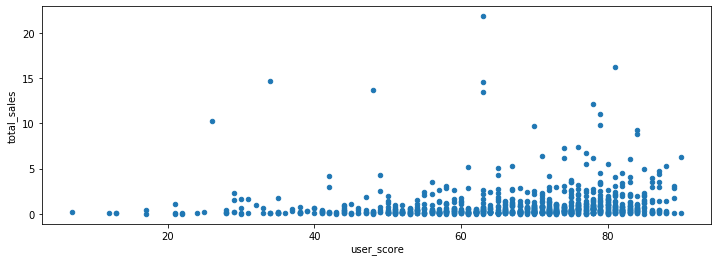

In [22]:
(
    df_by_top[(df_by_top['platform'] == 'X360') & (df_by_top['user_score'] > 0)]
    .plot(x='user_score', y='total_sales', kind='scatter', figsize=(12,4))
)

Рассмотрим зависимость между рейтингами критиков или пользоваталей с выручкой от продаж игр.<br>
Наблюдается увеличение выручки с ростом рейтинга. Однако взаимосвязь между пользовательским рейтингом и выручкой менее очевидна, чем между рейтингом критиков и выручкой.<br>
Веротяно, это происходит из-за того, что покупатели меньше обращают внимания на отзывы пользователей, чем на критику в прессе.

In [23]:
df_by_top.loc[:, ['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.521350,0.230683
user_score,0.521350,1.000000,0.139659
total_sales,0.230683,0.139659,1.000000


По всем платформам прослеживается аналогичная закономерность. Корреляция между пользовательским рейтингом и продажами ниже, чем между рейтингом критиков и продажами.

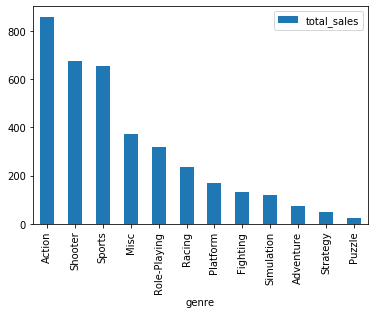

In [24]:
(
    df_by_top
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar')
)

Самая высокая выручка от игр в жанрах Action, Sports и Shooter. Другие жанры сильно отстают.<br>
Меньше всего денег приносят игры в жанрах Puzzle, Strategy. Вероятно, у них ниже стоимость, и также слабее маркетинг, так как жанры недорогие в разработке и редко выходтят на крупных платформах.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Выводы абсолютно правильные, двигаешь в верном направлении

## Портрет пользоователя по регионам

In [25]:
def plot_by_regions(sort_by, region_sales, ax):
    titles = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    colors = {'na_sales': 'Blue', 'eu_sales': 'Red', 'jp_sales': 'Green'}
    (
        df_by_top
        .pivot_table(index=sort_by, values=region_sales, aggfunc='sum')[:5]
        .sort_values(by=region_sales, ascending=False)
        .plot(kind='bar', ax=axes[ax], color=colors[region_sales], title=titles[region_sales])
    )

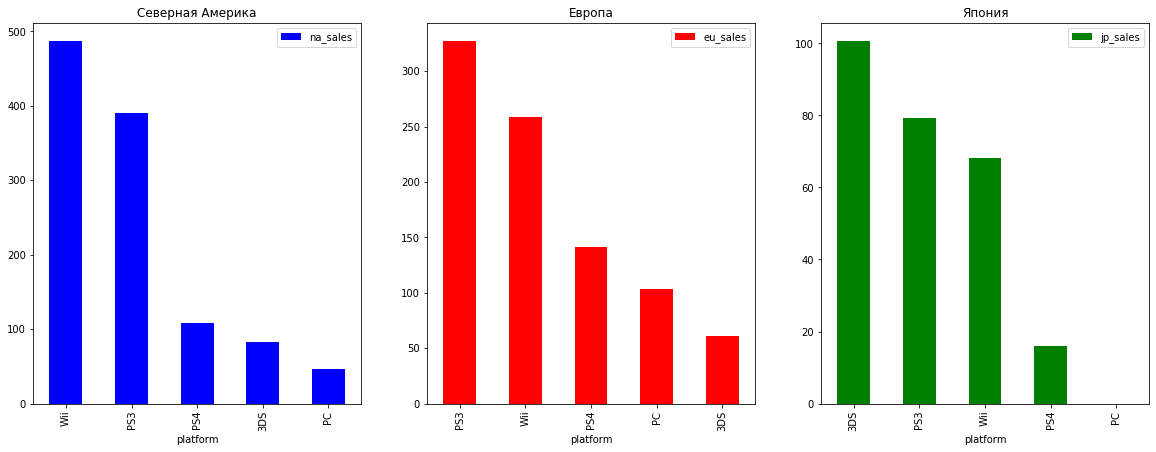

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))
plot_by_regions('platform', 'na_sales', 0)
plot_by_regions('platform', 'eu_sales', 1)
plot_by_regions('platform', 'jp_sales', 2)

<b>Выводы:</b>
<br><br>
<b>Америка</b><br>
<ul>
<li>Больше всего денег принесли игры на семеной патформе Wii — она очень популярна в этом регионе.</li>
<li>Также оказалась популярна консоль прошлого поколения PS3. Выручка от игр на этой платформе на 20% ниже.</li>
<li>Выручка от игр на платформе PS4 примерно в 5 раз ниже, чем на Wii, и в 4 раза ниже, чем на PS3.</li>
</ul>
<b>Европа</b><br>
<ul>
<li>Лидирует платформа PS3 с выручкой от игр в 300 млн.</li>
<li>На 15% ниже выручка на платформе Wii.</li>
<li>Выручка от игр на PS4 в 2 раза ниже, чем на PS3.</li>
</ul>
<b>Япония</b><br>
<ul>
<li>Портативная консоль 3DS лидирует с выручкой от игр в 100 млн.</li>
<li>На 20% ниже выручка от игр на PS3.</li>
<li>Игры на PS4 пока продались слабо — всего 20 млн.</li>
<li>Платформа PC не популярна.
</ul>

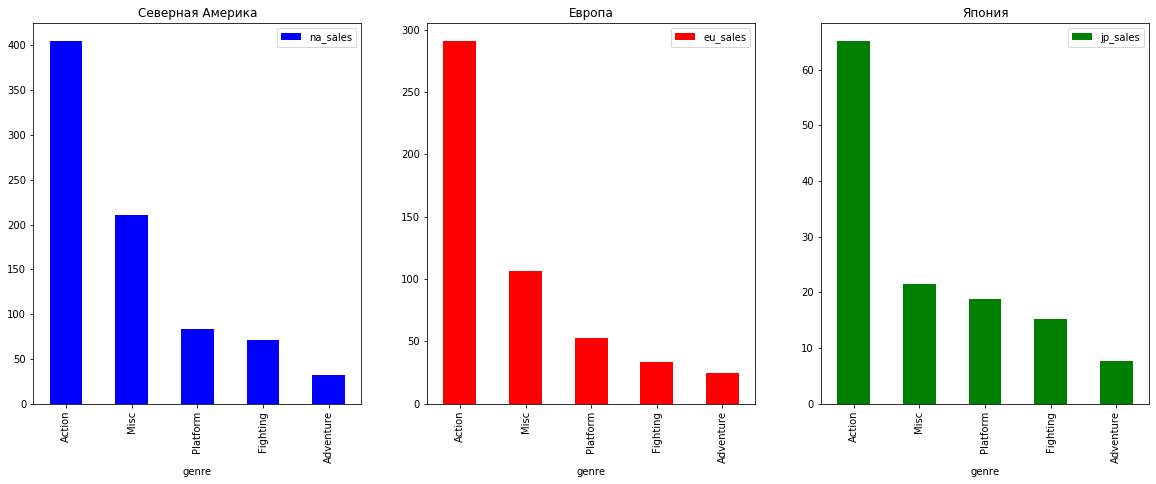

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))
plot_by_regions('genre', 'na_sales', 0)
plot_by_regions('genre', 'eu_sales', 1)
plot_by_regions('genre', 'jp_sales', 2)

<b>Выводы:</b>
<br><br>
<b>Америка</b>
<ul>
<li>Самая высокая выручка от игр в жанре Action — 400 млн.</li>
<li>Выручка от игр в других жанрах не превышает 200 млн.</li>
<li>Жанр с наименьшей выручкой — Adventure.</li>
</ul>
<b>Европа</b>
<ul>
<li>Самая высокая выручка от игр в жанре Action — 300 млн.</li>
<li>Выручка от игр в других жанрах не превышает 100 млн.</li>
</ul>
<b>Япония</b>
<ul>
<li>Самая высокая выручка от игр в жанре Action — 70 млн. Почти в 6 раз меньше, чем в Америке.</li>
<li>Выручка от игр в других жанрах не превышает 20 млн.</li>
<li>Вероятно, это связано с преобладающей популярностью портативнй платформы 3DS.</li>
</ul>

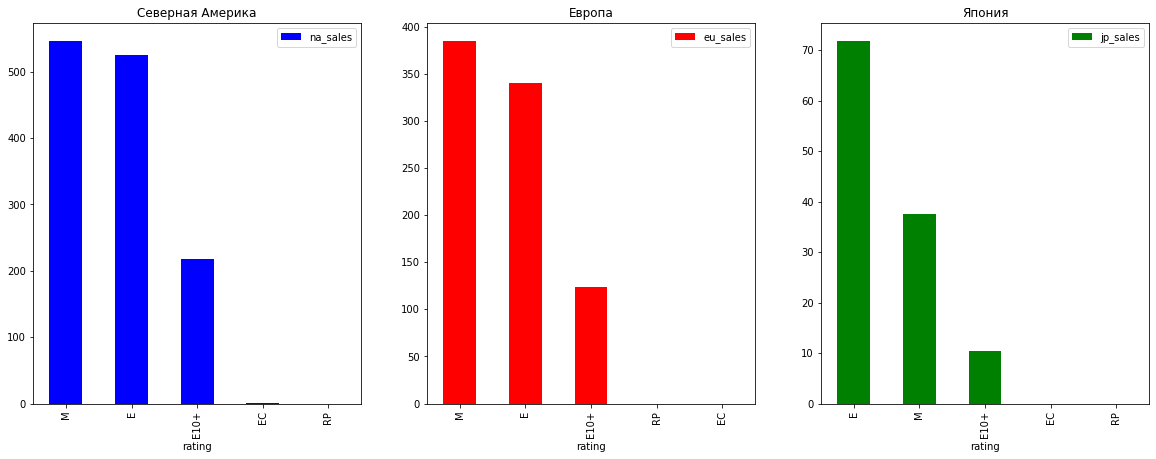

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))
plot_by_regions('rating', 'na_sales', 0)
plot_by_regions('rating', 'eu_sales', 1)
plot_by_regions('rating', 'jp_sales', 2)

<b>Выводы:</b>
<br><br>
<b>Америка</b>
<ul>
<li>Выручка от игр с рейтингом M "для взрослых" и ретингом E "для всех" примерно равны — более 500 млн.</li>
<li>Игры с рейтингом 10+ приносят меньше денег — около 200 млн.</li>
<li>Игры с рейтингом EC "для детей" почти не приносят денег.</li>
<li>Игры с временным рейтингом RP отсутствуют в продаже (рейтинг используется для рекламных презентаций).</li>
</ul>
<b>Европа</b>
<ul>
<li>Выручка от игр с рейтингом M "для взрослых" и ретингом E "для всех" примерно равны — 350-400 млн.</li>
<li>Игры с рейтингом 10+ приносят меньше денег — около 120 млн.</li>
</ul>
<b>Япония</b>
<ul>
<li>Игры с рейтингом "для всех" доминируют — около 70 млн.</li>
<li>Игры с рейтингом M "для взрослых" продались только на 40 млн.</li>
<li>Игры с рейтингом 10+ принесли всего около 10 млн.</li>
</ul>

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red ; margin-bottom:20px">Комментарий наставника</h1>

Хотелось бы видеть больше визуализаций (например с использованием библиотеки Seaborn) и более подробные выводы + пояснения к промежуточным результатам


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
Результаты верные, выводы тоже сформулированы правильно, так держать)

## Проверка гипотез

<b>Гипотеза 1:</b><br>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [29]:
df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score'].describe()

count    182.000000
mean      65.214286
std       13.809406
min       16.000000
25%       58.000000
50%       68.000000
75%       75.000000
max       92.000000
Name: user_score, dtype: float64

In [30]:
df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score'].describe()

count    770.000000
mean      70.624675
std       15.299631
min       14.000000
25%       62.000000
50%       75.000000
75%       82.000000
max       93.000000
Name: user_score, dtype: float64

Проверяем среднее значение пользовательского рейтинга.<br>
Среднее пользовательского рейтинга отличается незначительно. Проверим, могут ли такие различия быть получены случайно.<br><br>
Для этого формируем нелевую гипотезу: <b>Пользовательский рейтинг на XOne и PC не отличается</b>.<br>
Альтернативная гипотеза: <b>Средний пользовательский рейтинг на PC отличается от XOne</b>.<br>
Общепринятый уровень статистической значимости <i>5%</i>. Будем использовать его.

In [31]:
alpha = .05

results = st.ttest_ind(
    df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score'], 
    df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548407e-05
Отвергаем нулевую гипотезу


Значение p-value меньше критического уровня статистической значимости. Такую разницу в средних значения <b>маловероятно получить случайно</b>.<br>
Нулевую гипотезу о том, что пользовательский рейтинг на платформах не отличается — отвергаем.

<b>Гипотеза 2:</b><br>
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [32]:
df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score'].describe()

count    1830.000000
mean       70.540437
std        14.253936
min         3.000000
25%        63.000000
50%        74.000000
75%        81.000000
max        95.000000
Name: user_score, dtype: float64

In [33]:
df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score'].describe()

count    1103.000000
mean       69.611967
std        16.113704
min         2.000000
25%        61.000000
50%        74.000000
75%        81.000000
max        95.000000
Name: user_score, dtype: float64

Проверяем среднее значение пользовательского рейтинга.<br>
Среднее пользовательского рейтинга отличается незначительно. Проверим, могут ли такие различия быть получены случайно.<br><br>
Для этого формируем нелевую гипотезу: <b>Пользовательский рейтинг в жанрах Action и Sports не отличаются</b>.<br>
Альтернативная гипотеза: <b>Средний пользовательский рейтинг жанра Action отличается от Sports</b>.<br>
Общепринятый уровень статистической значимости <i>5%</i>. Будем использовать его.

In [34]:
results = st.ttest_ind(
    df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score'], 
    df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359050075
Не получилось отвергнуть нулевую гипотезу


P-value указывает на то, что на текущих выборках есть <b>10% вероятность получить случайно разницу пользовательского рейтинга</b>.<br>
Это значит, что у нас нет оснований предполагать, что рейтинг в жанрах Action и Sports отличается.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё верно и точно сделано, как выводы, так и код написаны правильно


## Выводы

<ul>
<li>Самые высокие выручки от игр на платформах 'Wii', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne'. Однако на данный момент актуальны только платформы 'PS4', '3DS', 'PC', 'XOne'.</li>
<li>Продажи игр на PS4 выше, чем на XOne. 3DS отстает, так как уже на "закате" актуальности.</li>
<li>Игры на PC продаются плохо.</li>
<li>Продажи игр зависят от рейтинга критиков. Выше рейтинг — выше продажи. И меньше зависят от рейтинга игроков.</li>
<li>Больше всего выручка от игр в жанрах Action, Shooter и Sports.</li>
<li>Нет оснований предполагать, что в жанрах Action и Sports пользовательский рейтинг отличается.</li>
<li>Игры жанра Puzze продются хуже. Вероятно, так как стоят меньше.</li>
<li>В Америке больше всего выручки прринесла семейная платформа Wii, в европе — PS3, а в Японии — портативная 3DS.</li>
<li>Однако игры с рейтингом "для взрослых" принесли в Америке и Европе больше всего денег, а в Японии — "игры для всех".</li>
<li>Средний пользовательский рейтинг игр на PC и XOne отличается, несмотря на то, что это по сути единая платформа для Microsoft.</li>
</ul>
<br><br>
В целом видно, что выручка от игр падает. Наибольшей популярностью пользуются дорогие проекты в "тяжелых" жанрах, таких как Action, Shooter и Sport. Более дешевые игры, такие как аркады, платформеры и другие не приносят большго количества денег. Вероятно, их долю со стационарных платформ отнимают мобильные устройств. Из полностью игровых портативных консолей популярностью пользуется только 3DS и преимущественно в Японии. PSV от Sony потерпела крах и игры на на нее практически не продаются.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
Цельный и обоснованный вывод, отлично рассуждаешь, класс)

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Работа хорошая, но стоит исправить обозначенные неточности, буду ждать исправленный вариант


<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)